<a href="https://colab.research.google.com/github/AAKANKSHA123-123/AAKANKSHA123-123/blob/main/Copy_of_Attention_1_of_Final_of_Newcodevisualvgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction and data collection**

In [2]:
#importing packages
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import json
import math
from google.colab import drive

In [3]:
import tensorflow as tf

# We'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
#import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np
import pandas as pd
import os
import time
import json
import collections
import operator
from glob import glob
from PIL import Image
import pickle
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from tensorflow import reshape
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Embedding, LSTM, Activation,ZeroPadding1D,Conv1D

print("Done imports")

Done imports


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

**Mounting drive for saving data**

In [5]:
drive.mount('/content/drive/', force_remount=True) #mouting the drive

Mounted at /content/drive/


**Downloading COCO images**

**Downloading VQA Questions**

In [6]:
annotation_zip = tf.keras.utils.get_file('captions.zip',cache_subdir=os.path.abspath('.'),origin = 'http://images.cocodataset.org/annotations/annotations_trainval2014.zip',extract = True)

annotation_file = os.path.dirname(annotation_zip)+'/annotations/captions_train2014.json'

name_of_zip = 'train2014.zip'
if not os.path.exists(os.path.abspath('.')+'/' + name_of_zip):
  image_zip = tf.keras.utils.get_file(name_of_zip,cache_subdir=os.path.abspath('.'),origin='http://images.cocodataset.org/zips/train2014.zip',extract=True)
  PATH = os.path.dirname(image_zip)+'/train2014'
else:
  PATH = os.path.abspath('.')+'/train2014'  

13510582272/13510573713 [==============================] - 876s 0us/step


In [7]:
print(PATH)
#!wget https://s3.amazonaws.com/cvmlp/vqs/mscoco/vqa/v2_Questions_Train_mscoco.zip
#!unzip -a v2_Questions_Train_mscoco.zip
!wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Train_mscoco.zip
!unzip -a v2_Annotations_Train_mscoco.zip
!wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Train_mscoco.zip
!unzip -a v2_Questions_Train_mscoco.zip

/content/train2014
--2022-03-01 18:14:08--  https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Train_mscoco.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.77.78
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.77.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21708861 (21M) [application/zip]
Saving to: ‘v2_Annotations_Train_mscoco.zip’

v2_Annotations_Trai 100%[===================>]  20.70M  8.22MB/s    in 2.5s    

2022-03-01 18:14:11 (8.22 MB/s) - ‘v2_Annotations_Train_mscoco.zip’ saved [21708861/21708861]

Archive:  v2_Annotations_Train_mscoco.zip
  inflating: v2_mscoco_train2014_annotations.json  [text]  
--2022-03-01 18:14:14--  https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Train_mscoco.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.136.96
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.136.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7239401 (6.9M) [appl

In [8]:
# read the json file
question_file_path = 'v2_OpenEnded_mscoco_train2014_questions.json'
with open(question_file_path, 'r') as f:
    questions = json.load(f)

print("Total Number Questions is : ",len(questions['questions']))

Total Number Questions is :  443757


**Added code from separate image model**

In [9]:
#Storing the captions and image file name in vectors
import collections
import operator

annotation_file = 'v2_mscoco_train2014_annotations.json'

with open(annotation_file,'r') as f:
  annotations = json.load(f)



all_answers = []
all_answers_qids = []
all_img_name_vector = []

for annot in annotations['annotations']:
  #print(annot)
  ans_dic = collections.defaultdict(int)
  for each in annot['answers']:
    diffans = each['answer']
    if diffans in ans_dic:
      #print(each['answer_confidence'])
      if each['answer_confidence']=='yes':
        ans_dic[diffans]+=4
      if each['answer_confidence']=='maybe':
        ans_dic[diffans]+=2
      if each['answer_confidence']=='no':
        ans_dic[diffans]+=1
    else:
      if each['answer_confidence']=='yes':
        ans_dic[diffans]+=4
      if each['answer_confidence']=='maybe':
        ans_dic[diffans]+=2
      if each['answer_confidence']=='no':
        ans_dic[diffans]+=1

  #print(ans_dic)
  most_fav = max(ans_dic.items(),key=operator.itemgetter(1))[0]
  #print(most_fav)
  caption = '<start>' + most_fav + '<end>'  #each['answer']

  image_id = annot['image_id']
  question_id = annot['question_id']
  full_coco_image_path = PATH  + '/COCO_train2014_' + '%012d.jpg' %(image_id)

  all_img_name_vector.append(full_coco_image_path)
  all_answers.append(caption)
  all_answers_qids.append(question_id)










In [10]:
all_questions = []
question_ids = []
all_img_name_vector_2 = []


for annot in questions['questions']:
  caption = '<start>' + annot['question'] + '<end>'
  image_id = annot['image_id']
  full_coco_image_path = PATH + '/COCO_train2014_' + '%012d.jpg' %(image_id)
  
  all_img_name_vector_2.append(full_coco_image_path)
  all_questions.append(caption)
  #print(all_questions)
  question_ids.append(annot['question_id'])

In [11]:
print(questions['questions'][np.random.randint(0,443757)])#new ms coco code

{'image_id': 441504, 'question': 'What color is the stripe?', 'question_id': 441504000}


In [12]:
#Taken from separate image model
print(len(all_img_name_vector),len(all_answers),len(all_answers_qids))
print(all_img_name_vector[10:15],all_answers[10:15],all_answers_qids[10:15])
print(len(all_img_name_vector_2),len(all_questions),len(question_ids))
print(all_img_name_vector_2[10:15],all_questions[10:15],question_ids[10:15])

443757 443757 443757
['/content/train2014/COCO_train2014_000000393221.jpg', '/content/train2014/COCO_train2014_000000393221.jpg', '/content/train2014/COCO_train2014_000000393221.jpg', '/content/train2014/COCO_train2014_000000393223.jpg', '/content/train2014/COCO_train2014_000000393223.jpg'] ['<start>yes<end>', '<start>yes<end>', '<start>contrail<end>', '<start>yes<end>', '<start>white and purple<end>'] [393221000, 393221001, 393221002, 393223000, 393223001]
443757 443757 443757
['/content/train2014/COCO_train2014_000000393221.jpg', '/content/train2014/COCO_train2014_000000393221.jpg', '/content/train2014/COCO_train2014_000000393221.jpg', '/content/train2014/COCO_train2014_000000393223.jpg', '/content/train2014/COCO_train2014_000000393223.jpg'] ['<start>Is the sky blue?<end>', '<start>Is there snow on the mountains?<end>', '<start>What is the white streak?<end>', '<start>Is the window open?<end>', '<start>What color is the toothbrush?<end>'] [393221000, 393221001, 393221002, 393223000, 

**Shuffling all questions and answers(taken from separate image model)**

In [13]:
'''train_answers,train_questions,img_name_vector = shuffle(all_answers,all_questions,all_img_name_vector,random_state=1)
#train_answers,train_questions,img_name_vector = (all_answers,all_questions,all_img_name_vector)
num_examples=500

train_answers = train_answers[:num_examples]
train_questions = train_questions[:num_examples]
img_name_vector =img_name_vector[:num_examples]'''

'''print(img_name_vector[0],train_questions[0],train_answers[0])
print(len(img_name_vector),len(train_questions),len(train_answers))'''

'print(img_name_vector[0],train_questions[0],train_answers[0])\nprint(len(img_name_vector),len(train_questions),len(train_answers))'

**Downloading VQA Annotations**

In [14]:
annotation_file_path = 'v2_mscoco_train2014_annotations.json'
with open(annotation_file_path, 'r') as f:
    annotations = json.load(f)

In [15]:
annotations['annotations'][np.random.randint(0,443757)]

{'answer_type': 'yes/no',
 'answers': [{'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 1},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 2},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 3},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 4},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 5},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 6},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 7},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 8},
  {'answer': 'no', 'answer_confidence': 'maybe', 'answer_id': 9},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 10}],
 'image_id': 554982,
 'multiple_choice_answer': 'no',
 'question_id': 554982003,
 'question_type': 'do you'}

In [16]:
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


**Data preprocessing**


In [17]:
#importing packages
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import json
import seaborn as sns
import tensorflow as tf

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud
from google.colab import drive

Populating the interactive namespace from numpy and matplotlib


**Variables**

**DATA TRANSFORMATION**
LOADING QUESTIONS AND ANSWERS

In [18]:
with open(question_file_path, 'r') as f:
    questions = json.load(f)
    questions = questions["questions"]

with open(annotation_file_path, 'r') as f:
    annotations = json.load(f)
    annotations = annotations["annotations"]

In [19]:
print("Total Number Questions is : ",len(questions))

Total Number Questions is :  443757


In [20]:
questions_df = pd.DataFrame(questions).sample(n=10000)
#questions_df = pd.DataFrame(questions)
#ques_samp = questions_df.sample(n=100)
#ques_samp.head(5)

questions_df.head(5)

,image_id,question,question_id
375930,372121,What sort of drinks are offered?,372121027
403710,380859,Do they look bored?,380859009
142771,40428,What animal is this?,40428002
20046,25352,Is there water in the picture?,25352022
251433,202991,Is this relaxing?,202991007


In [21]:
annotations_df = pd.DataFrame(annotations).sample(n=10000)
#annotations_df = pd.DataFrame(annotations)
#annot_samp = annotations_df.sample(n=100)
#annot_samp.head(5)
annotations_df.head(5)
print(len(annotations_df))

10000


**MERGING QUESTIONS AND ANNOTATIONS**

In [22]:
data = pd.merge(questions_df,annotations_df,  how='inner', left_on=['image_id','question_id'], right_on = ['image_id','question_id'])
#data_samp = pd.merge(ques_samp,annot_samp,  how='inner', left_on=['image_id','question_id'], right_on = ['image_id','question_id'])
print(len(data))


236


In [23]:
data.head(5)
#data_samp.head(5)

,image_id,question,question_id,question_type,multiple_choice_answer,answers,answer_type
0,572209,What are the people waiting for?,572209001,what are the,their turn,"[{'answer': 'their turn', 'answer_confidence':...",other
1,201273,Is this case handmade?,201273006,is this,no,"[{'answer': 'no', 'answer_confidence': 'maybe'...",yes/no
2,426690,What is the main color of this cat?,426690000,what is the,gray,"[{'answer': 'gray', 'answer_confidence': 'yes'...",other
3,568062,Is the cat sleeping?,568062004,is the,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
4,565149,How many sunglasses?,565149000,how many,2,"[{'answer': '2', 'answer_confidence': 'maybe',...",number


In [24]:
#currentDirectory = "/content/drive/My Drive/pcase_study_2/"
#os.chdir(currentDirectory)
#currentDirectory = ""
#dataDirectory = currentDirectory + "data/"
#imageDirectory = dataDirectory + "train2014/"
imageDirectory = '/content/train2014'
#question_file_path = dataDirectory + 'v2_OpenEnded_mscoco_train2014_questions.json'
question_file_path = '/content/v2_OpenEnded_mscoco_train2014_questions.json'
#annotation_file_path = dataDirectory + 'v2_mscoco_train2014_annotations.json'
annotation_file_path = '/content/v2_mscoco_train2014_annotations.json'

In [25]:
imageDirectory = '/content/train2014'
os.chdir(imageDirectory)
imageDirectory = ""

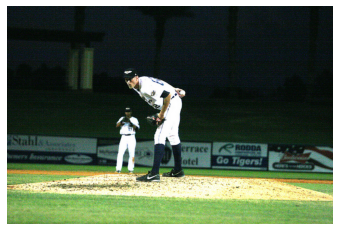

In [26]:
index = np.random.randint(0,len(data))#263115
img_path =  imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (data['image_id'][index])
img=mpimg.imread(img_path)

imgplot = plt.imshow(img)
plt.axis('off')
plt.show()
print("*"*50)
print("Question : " ,data['question'][index])
print("*"*50)
print("Answer : ", data['multiple_choice_answer'][index])

print(img.shape)

**IMAGES**

**************************************************
Question :  How high does the pitcher have his socks pulled up?
**************************************************
Answer :  knee
(427, 640, 3)
     image_id  question
0        3178         1
1        3988         1
2        5010         1
3       14861         1
4       15257         1
..        ...       ...
231    568062         1
232    570902         1
233    572209         1
234    572469         1
235    576550         1

[236 rows x 2 columns]
236
Max number of questions on a image 1
Min number of questions on a image 1
Mean of questions on a image 1.0


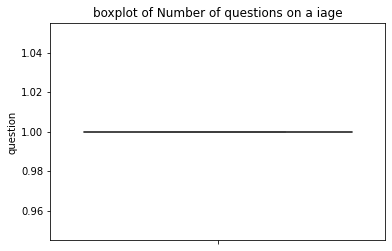

In [27]:
aggregations = {'question': 'count'}
temp = pd.DataFrame(data.groupby(['image_id'],as_index=False).agg(aggregations))
#temp.set_index('image_id', inplace=True)

print(temp)
print(len(temp))
num_of_ques_in_image = temp['question'].values
print("Max number of questions on a image",max(num_of_ques_in_image))
print("Min number of questions on a image",min(num_of_ques_in_image))
print("Mean of questions on a image",np.mean(num_of_ques_in_image))

ax = sns.boxplot(y = 'question', data = temp) 
plt.title("boxplot of Number of questions on a iage")
plt.show()

**IMAGES THAT HAVE MAXIMUM NUMBER OF QUESTIONS**

**Duplicate questions on same image**

In [28]:
aggregations = {'question_id':'count', 'multiple_choice_answer': lambda x: " || ".join(x)}
temp = pd.DataFrame(data.groupby(['image_id','question'],as_index=False).agg(aggregations)).rename(columns={'question_id':'count'})
temp = temp[temp['count']>1]
temp

,image_id,question,count,multiple_choice_answer


**Question type**

In [29]:
data.question_type.unique()

array(['what are the', 'is this', 'what is the', 'is the', 'how many',
       'where is the', 'what is', 'is there a', 'are there', 'what',
       'what room is', 'is this a', 'what type of', 'which',
       'what color is the', 'do you', 'what is the color of the',
       'what color', 'what sport is', 'what brand', 'is this person',
       'why', 'is it', 'are', 'could', 'does this', 'are the',
       'none of the above', 'who is', 'is that a', 'what color is',
       'what kind of', 'is there', 'how', 'are they',
       'what is the person', 'what color are the', 'why is the',
       'are these', 'what are', 'is this an', 'how many people are in',
       'is', 'how many people are', 'has', 'is the woman',
       'what is the woman', 'is the man', 'what animal is', 'does the',
       'what is the name', 'what is this', 'what is the man',
       'what is in the'], dtype=object)

In [30]:
print("Number of unique Question type in dataset : ",len(data.question_type.unique()))

Number of unique Question type in dataset :  54


In [31]:
def getFrequnctDict(data,column,isJoin=False):
    column_frequency = {}

    for _row in data[column]:
        if isJoin:
            _row = "_".join(_row.split())
        if(column_frequency.get(_row,-1) > 0):
            column_frequency[_row] += 1
        else:
            column_frequency[_row] = 1

    return column_frequency

def lineChart(data,column,top=20,isJoin=False):
    column_frequncy = getFrequnctDict(data,column,isJoin)
    sort_column_frequncy = sorted(list(column_frequncy.items()),key = lambda x: x[1],reverse=True)
    total_samples =  len(data)

    plt.plot([x[1]for x in sort_column_frequncy[:top]])
    i=np.arange(top)
    plt.title("Frequency of top " + str(top) + " " + column )
    plt.xlabel("Tags")
    plt.ylabel("Counts")
    plt.xticks(i,[x[0] for x in sort_column_frequncy[:top]])
    plt.xticks(rotation=90)
    plt.show()
    return sort_column_frequncy

def plotWordCloud(data,column,isJoin=False):
    column_frequncy = getFrequnctDict(data,column,isJoin)
    #https://www.geeksforgeeks.org/generating-word-cloud-python/
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = None, 
                    min_font_size = 10).generate_from_frequencies(column_frequncy)
    # plot the WordCloud image     
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title("WordCloud on "+ column)  
    plt.show()

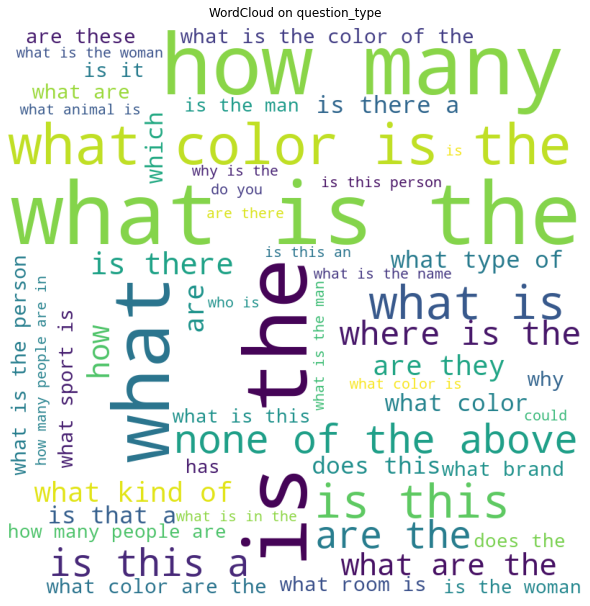

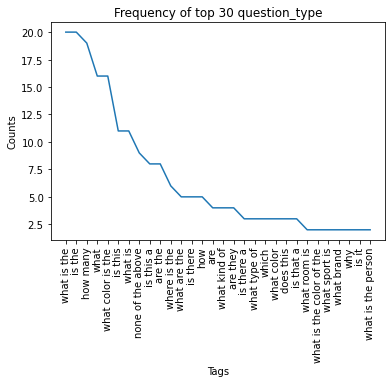

In [32]:
plotWordCloud(data, 'question_type')
question_type_frequncy = lineChart(data, 'question_type', top = 30)

In [33]:
for _type,_count in question_type_frequncy[:10]:
    print("Percentage of '" + _type + "' Type of Questions in Dataset is ", str(100*_count/len(data))) 

Percentage of 'what is the' Type of Questions in Dataset is  8.474576271186441
Percentage of 'is the' Type of Questions in Dataset is  8.474576271186441
Percentage of 'how many' Type of Questions in Dataset is  8.05084745762712
Percentage of 'what' Type of Questions in Dataset is  6.779661016949152
Percentage of 'what color is the' Type of Questions in Dataset is  6.779661016949152
Percentage of 'is this' Type of Questions in Dataset is  4.661016949152542
Percentage of 'what is' Type of Questions in Dataset is  4.661016949152542
Percentage of 'none of the above' Type of Questions in Dataset is  3.8135593220338984
Percentage of 'is this a' Type of Questions in Dataset is  3.389830508474576
Percentage of 'are the' Type of Questions in Dataset is  3.389830508474576


**ANSWERS**

In [34]:
data['answer_type'].unique()

array(['other', 'yes/no', 'number'], dtype=object)

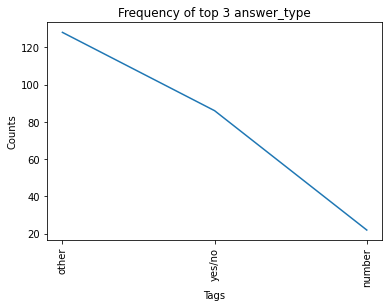

In [35]:
answer_type_frequncy = lineChart(data, 'answer_type', top = 3)

In [36]:
for _type,_count in answer_type_frequncy:
    print("Percentage of '" + _type + "' Type of Answers in Dataset is ", str(100*_count/len(data)) )

Percentage of 'other' Type of Answers in Dataset is  54.23728813559322
Percentage of 'yes/no' Type of Answers in Dataset is  36.440677966101696
Percentage of 'number' Type of Answers in Dataset is  9.322033898305085


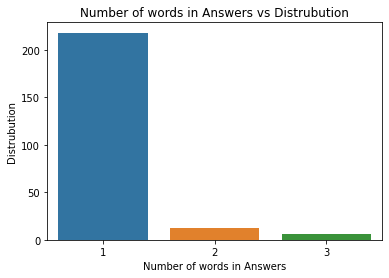

In [37]:
sns.countplot(data["multiple_choice_answer"].apply(lambda x: len(x.split())).values)
plt.title("Number of words in Answers vs Distrubution")
plt.xlabel("Number of words in Answers")
plt.ylabel("Distrubution")
plt.show()

**QUESTION**

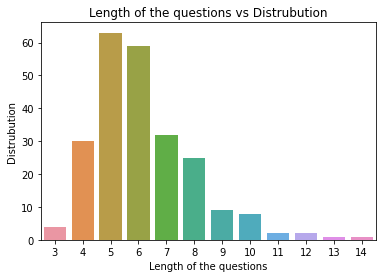

In [38]:
sns.countplot(data["question"].apply(lambda x: len(x.split())).values)
plt.title("Length of the questions vs Distrubution")
plt.xlabel("Length of the questions")
plt.ylabel("Distrubution")
plt.show()

**QUESTION TYPE AND ANSWER**

In [39]:
temp = data
top_question = [x[0] for x in question_type_frequncy[:50]]
print(top_question)
top_aswers = [x[0] for x in answer_type_frequncy[:50]]
print(top_aswers)
temp = data[(data['question_type'].isin(top_question) | data['multiple_choice_answer'].isin(top_aswers))]

aggregations = {'question': 'count'}
temp = pd.DataFrame(temp.groupby(['question_type','multiple_choice_answer'],as_index= False).agg(aggregations))
temp = temp[temp['question']>=10]
temp = temp.pivot(index='question_type', columns='multiple_choice_answer', values='question')
#print(temp)

['what is the', 'is the', 'how many', 'what', 'what color is the', 'is this', 'what is', 'none of the above', 'is this a', 'are the', 'where is the', 'what are the', 'is there', 'how', 'are', 'what kind of', 'are they', 'is there a', 'what type of', 'which', 'what color', 'does this', 'is that a', 'what room is', 'what is the color of the', 'what sport is', 'what brand', 'why', 'is it', 'what is the person', 'what color are the', 'are these', 'what are', 'how many people are', 'has', 'is the woman', 'is the man', 'does the', 'what is this', 'are there', 'do you', 'is this person', 'could', 'who is', 'what color is', 'why is the', 'is this an', 'how many people are in', 'is', 'what is the woman']
['other', 'yes/no', 'number']


**QUESTION TYPE VS ANSWER**

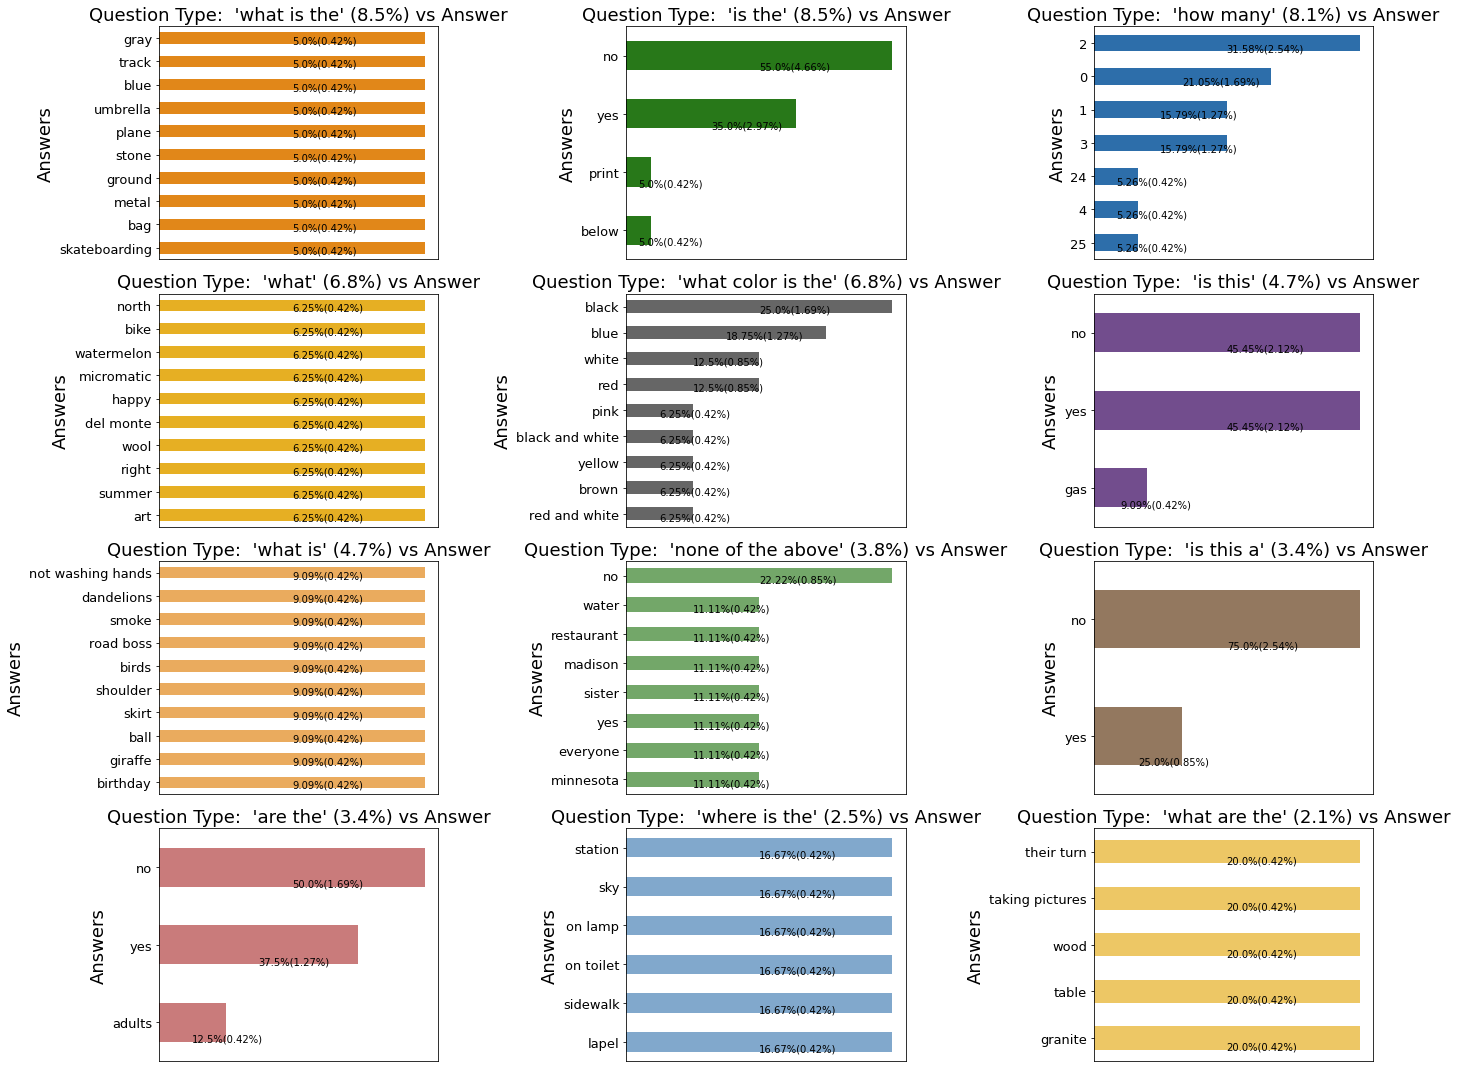

In [40]:
fig = plt.figure(figsize=(80,30))
fig.tight_layout() 
count = 1
colorCodes = [ "#E18719", "#287819", "#2D6EAA", "#E6AF23", "#666666","#724D8D", "#EAAB5E", "#73A769","#93785F",
              "#C97B7B", "#81A8CC", "#EDC765", "#858585","#957AA9", "#F3CFA3","#B4D0AF", "#BEADA0", "#E4BDBD", 
              "#ABC5DD", "#F4DB9C", "#A3A3A3"]

for _type,_ in question_type_frequncy[:12]:

    percentage = str(round((len(data[data['question_type']==_type])/len(data))*100,1))+'%'

    plt.subplot(4, 3, count)
    temp = data[data['question_type']==_type]
    ax = temp['multiple_choice_answer'].value_counts()[:10][::-1].plot(kind='barh', figsize=(20,15),color=colorCodes[count-1], fontsize=13)
    ax.set_alpha(0.8)   
    ax.set_title("Question Type:  '" + _type + "' (" + percentage + ") vs Answer" , fontsize=18)
    ax.set_ylabel("Answers", fontsize=18)
    ax.get_xaxis().set_visible(False)


    for i in ax.patches:
        ax.text(i.get_width()/2, i.get_y(), str(round((i.get_width()/len(temp))*100, 2))+'%' + "(" +
                str(round((i.get_width()/len(data))*100, 2))+'%' +")", fontsize=10,color='black')
        
    count += 1

fig.tight_layout()
plt.show()

**ANSWERS VS QUESTION TYPE**

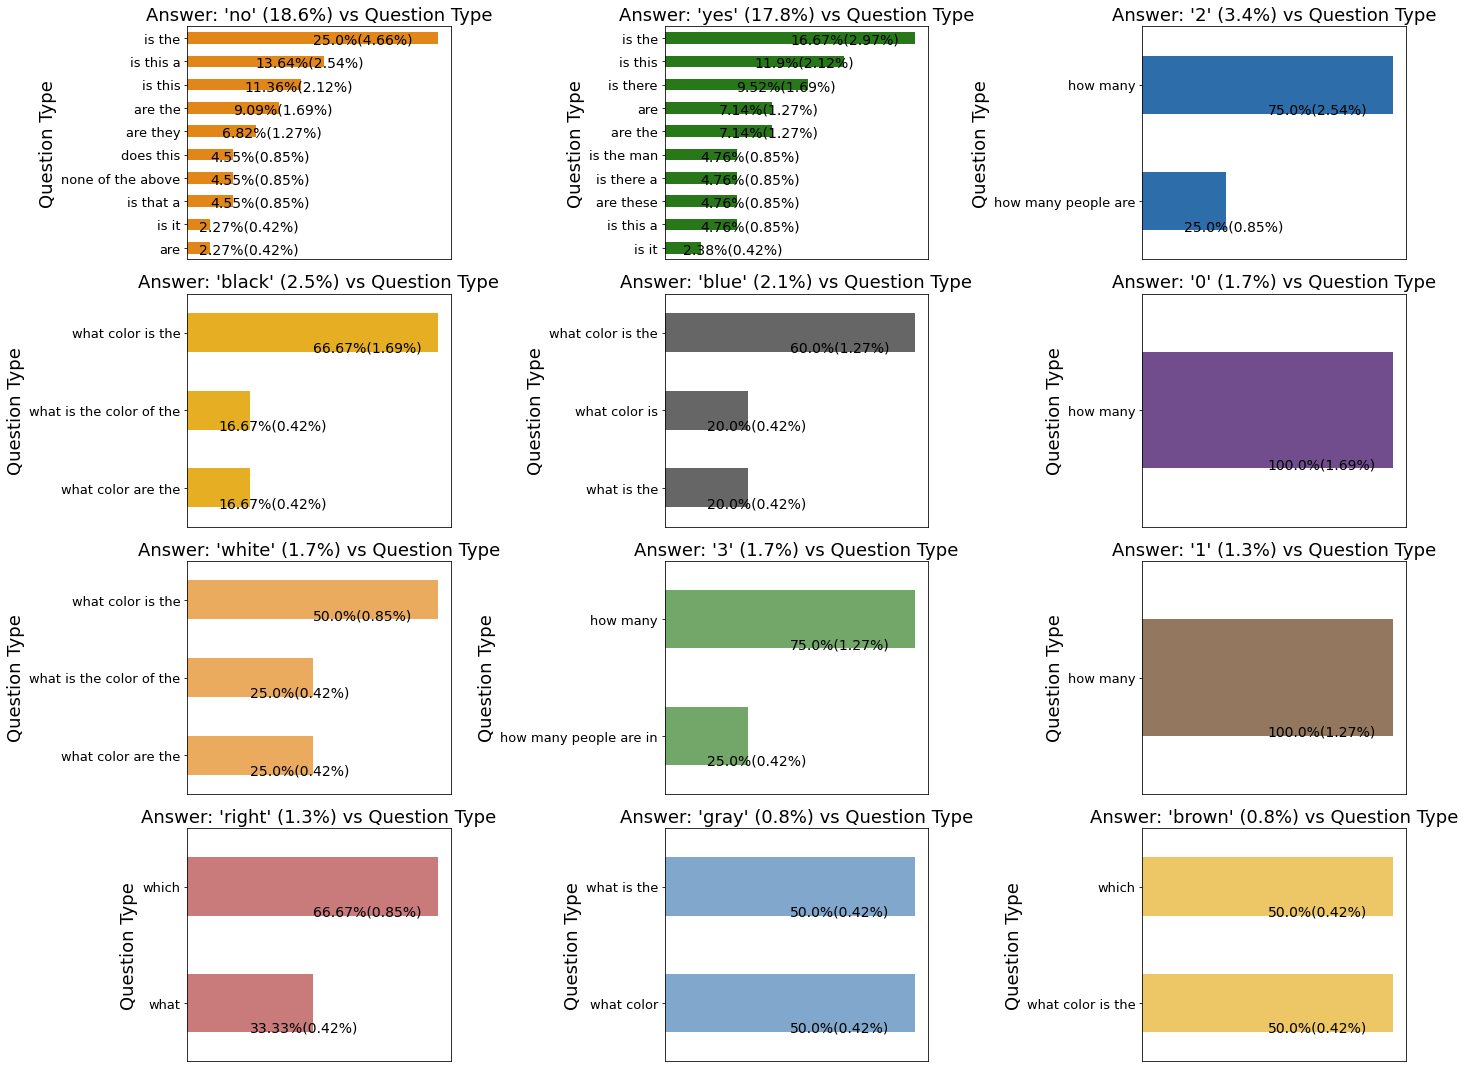

In [41]:
fig = plt.figure()
fig.tight_layout() 
count = 1

colorCodes = [ "#E18719", "#287819", "#2D6EAA", "#E6AF23", "#666666","#724D8D", "#EAAB5E", "#73A769","#93785F",
              "#C97B7B", "#81A8CC", "#EDC765", "#858585","#957AA9", "#F3CFA3","#B4D0AF", "#BEADA0", "#E4BDBD", 
              "#ABC5DD", "#F4DB9C", "#A3A3A3"]

answer_frequncy = sorted(list(getFrequnctDict(data,'multiple_choice_answer').items()),key = lambda x: x[1],reverse=True)

for _type,_ in answer_frequncy[:12]:

    percentage = str(round((len(data[data['multiple_choice_answer']==_type])/len(data))*100,1))+'%'

    plt.subplot(4, 3, count)
    temp = data[data['multiple_choice_answer']==_type]
    ax = temp['question_type'].value_counts()[:10][::-1].plot(kind='barh', figsize=(20,15),color=colorCodes[count-1], fontsize=13)
    ax.set_alpha(0.8)   
    ax.set_title("Answer: '" + _type + "' (" + percentage + ") vs Question Type" , fontsize=18)
    ax.set_ylabel("Question Type", fontsize=18)
    ax.get_xaxis().set_visible(False)

    for i in ax.patches:
        ax.text(i.get_width()/2, i.get_y(), str(round((i.get_width()/len(temp))*100, 2))+'%' + "(" +
                str(round((i.get_width()/len(data))*100, 2))+'%' +")", fontsize=14,color='black')
        
    count += 1

fig.tight_layout()
plt.show()

In [42]:
'''import shutil
shutil.rmtree('/content/drive/MyDrive/newresultsdata.csv', ignore_errors=True)'''

"import shutil\nshutil.rmtree('/content/drive/MyDrive/newresultsdata.csv', ignore_errors=True)"

**CHECKING IF ACTUAL ANSWER IS SAME AS PERSONS ANSWERS**

In [43]:
def getPeopleAnswer(answers):
    answers_dict = {}
    score_dict = { 'yes' : 3, 'maybe' : 2, 'no' : 1 }
    for _answer in answers:
        score = score_dict[_answer['answer_confidence']]
        if answers_dict.get(_answer['answer'],-1) != -1 :
            answers_dict[_answer['answer']] += score
        else:
            answers_dict[_answer['answer']] = score

    return sorted(list(answers_dict.items()),key = lambda x: x[1],reverse=True)[0][0]

In [44]:
#data['derived_answer'] =  data["answers"].apply(lambda x: getPeopleAnswer(x))

In [45]:
#data[ data['derived_answer'] != data['multiple_choice_answer']]

In [46]:
!pwd

/content/train2014


In [47]:

dataDDirectory ='/content/drive/MyDrive/newresults'
os.chdir(dataDDirectory)
!pwd
data.to_csv(dataDDirectory + 'data.csv')

/content/drive/MyDrive/newresults


In [48]:
os.listdir(dataDDirectory)

['Models', '.ipynb_checkpoints', 'data']

**Modelling**

In [49]:
import warnings
warnings.filterwarnings("ignore")

import pickle
import os
import pandas as pd
import random as rn
import numpy as np
import tensorflow as tf
from google.colab import drive
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.regularizers import l1,l2
from tqdm import tqdm
import heapq
from sklearn.utils import shuffle
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


**Variables**

In [50]:
currentDirectory = "/content/drive/MyDrive/newresults/"
os.chdir(currentDirectory)
currentDirectory = ""
dataDirectory = currentDirectory + "data/"
#imageDirectory = dataDirectory + "train2014/"
imageDirectory = '/content/train2014/'
imageNumpyDirectory = dataDirectory + "train2014_Numpy" + ''

modelsDirectory = currentDirectory + "Models/"


img_width = 448
img_height = 448

BATCH_SIZE = 128
#BATCH_SIZE = 1
BUFFER_SIZE = 300

In [51]:
#len(os.listdir(imageNumpyDirectory))
data = pd.read_csv(dataDDirectory + 'data.csv')
X_train, X_val = train_test_split(data, test_size=0.2, random_state=42)

**Creating answer vectors**

In [52]:
contractions = { 
"ain't": "am not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because","could've": "could have","couldn't": "could not",
"couldn't've": "could not have","didn't": "did not","doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have",
"hasn't": "has not","haven't": "have not","he'd": "he would","he'd've": "he would have","he'll": "he will","he's": "he is","how'd": "how did",
"how'll": "how will","how's": "how is","i'd": "i would","i'll": "i will","i'm": "i am","i've": "i have","isn't": "is not","it'd": "it would",
"it'll": "it will","it's": "it is","let's": "let us","ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not",
"must've": "must have","mustn't": "must not","needn't": "need not","oughtn't": "ought not","shan't": "shall not","sha'n't": "shall not","she'd": "she would",
"she'll": "she will","she's": "she is","should've": "should have","shouldn't": "should not","that'd": "that would","that's": "that is","there'd": "there had",
"there's": "there is","they'd": "they would","they'll": "they will","they're": "they are","they've": "they have","wasn't": "was not","we'd": "we would",
"we'll": "we will","we're": "we are","we've": "we have","weren't": "were not","what'll": "what will","what're": "what are","what's": "what is",
"what've": "what have","where'd": "where did","where's": "where is","who'll": "who will","who's": "who is","won't": "will not","wouldn't": "would not",
"you'd": "you would","you'll": "you will","you're": "you are"
}

def preprocess_english(text):
    '''Given a text this function removes the punctuations and returns the remaining text string'''
    new_text = ""
    text = text.lower()
    i = 0
    for word in text.split():
      if i==0:
        new_text = contractions.get(word,word)
      else:
        new_text = new_text + " " + contractions.get(word,word)
      i += 1
    return new_text.replace("'s", '')

In [53]:
X_train['multiple_choice_answer'] = X_train['multiple_choice_answer'].apply(lambda x: preprocess_english(x))
X_val['multiple_choice_answer'] = X_val['multiple_choice_answer'].apply(lambda x: preprocess_english(x))

In [54]:
all_classes = X_train['multiple_choice_answer'].values
class_frequency = {}

for _cls in all_classes:
    if(class_frequency.get(_cls,-1)>0):
        class_frequency[_cls] += 1
    else:
        class_frequency[_cls] = 1

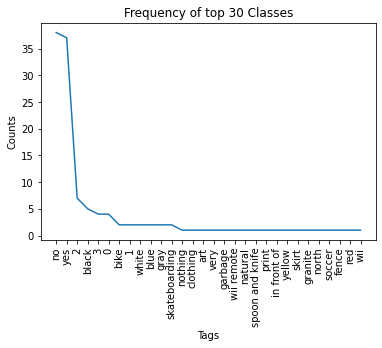

In [55]:
sort_class_frequency = sorted(list(class_frequency.items()),key = lambda x: x[1],reverse=True)   

plt.plot([x[1] for x in sort_class_frequency[:30]])
i=np.arange(30)
plt.title("Frequency of top 30 Classes")
plt.xlabel("Tags")
plt.ylabel("Counts")
plt.xticks(i,[x[0] for x in sort_class_frequency[:30]])
plt.xticks(rotation=90)
plt.show()

5 most frequent Classes covers 48.40% points
10 most frequent Classes covers 54.79% points
20 most frequent Classes covers 61.17% points
50 most frequent Classes covers 77.13% points
70 most frequent Classes covers 87.77% points
100 most frequent Classes covers 100.00% points
200 most frequent Classes covers 100.00% points
500 most frequent Classes covers 100.00% points
750 most frequent Classes covers 100.00% points
1000 most frequent Classes covers 100.00% points
2000 most frequent Classes covers 100.00% points
3000 most frequent Classes covers 100.00% points
5000 most frequent Classes covers 100.00% points


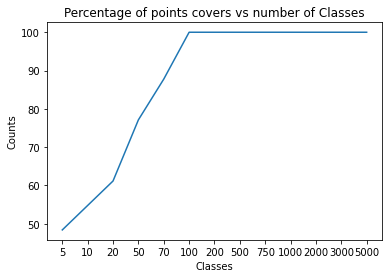

In [56]:
def getPercentageOfDataCoversGivenNumClasses(n_class, class_frequency, df):
    n_common_class = heapq.nlargest(n_class, class_frequency, key=class_frequency.get)
    count = 0
    for _class in df['multiple_choice_answer'].values:
        if(_class in n_common_class):
            count += 1

    return (count/len(df))*100
    
n_classes = [5,10,20,50,70,100,200,500,750,1000,2000,3000,5000]
percentage_cover = []
for i in n_classes:
    temp = getPercentageOfDataCoversGivenNumClasses(i,class_frequency,X_train)
    percentage_cover.append(temp)
    print("{} most frequent Classes covers {:.2f}% points".format(i,temp))


plt.plot(percentage_cover)
i=np.arange(len(percentage_cover))
plt.title("Percentage of points covers vs number of Classes")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.xticks(i,n_classes)
plt.show()

In [57]:
common_tags = heapq.nlargest(1000, class_frequency, key = class_frequency.get)
X_train['multiple_choice_answer'] =  X_train['multiple_choice_answer'].apply(lambda x: x if x in common_tags else '')

#removing question which has empty tags
X_train = X_train[X_train['multiple_choice_answer'].apply(lambda x: len(x)>0)]

In [58]:
label_encoder = LabelBinarizer()
answer_vector_train = label_encoder.fit_transform(X_train['multiple_choice_answer'].apply(lambda x: x).values)
answer_vector_val = label_encoder.transform(X_val['multiple_choice_answer'].apply(lambda x: x).values)

ans_vocab = {l: i for i, l in enumerate(label_encoder.classes_)}

print("Number of clasess: ", len(ans_vocab))
print("Shape of Answer Vectors in Train Data: ", answer_vector_train.shape)
print("Shape of Answer Vectors in Validation Data: ", answer_vector_val.shape)

Number of clasess:  93
Shape of Answer Vectors in Train Data:  (188, 93)
Shape of Answer Vectors in Validation Data:  (48, 93)


**Creating Image features using VGG19**

In [59]:
import pickle

def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (img_width, img_height))
    img = tf.keras.applications.vgg19.preprocess_input(img)
    img = img * (1./255)
    return img, image_path

def VGG19_Top():
    model = tf.keras.applications.VGG16(include_top=False,weights='imagenet',input_shape = (img_width, img_height,3))
    #model = tf.keras.applications.VGG19(include_top=False,weights='imagenet',input_shape = (img_width, img_height,3))
    input_layer = model.input
    hidden_layer = model.layers[-1].output 
    model = tf.keras.Model(input_layer, hidden_layer)
    return model

def generateImageFeatures(images):
    model = VGG19_Top()
    number_of_img_perDict = math.ceil(len(images)/10)
    count = 0
    batch_size = 16
    all_image_dict = {}
  
    img_ds = tf.data.Dataset.from_tensor_slices(images)
    img_ds = img_ds.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)
    
    for batch_img, batch_path in img_ds:
        batch_img_features = model(batch_img)
        #print(batch_img_features)

        for img_features, path in zip(batch_img_features, batch_path):
            image_path = path.numpy().decode("utf-8")
            #print(image_path)
            
            
            image_path = image_path.replace(imageDirectory,imageNumpyDirectory).replace('.jpg',"")
            #print(image_path)
            np.save(image_path, img_features.numpy())
            count += batch_size
            print(count,end='')
            all_image_dict[image_path] = img_features.numpy()
            print("Printing image features")
        if(count % (batch_size*100)==0):
            print('')
            #print(all_image_dict[image_path])
    
    #with open('filenamert.pickle', 'wb') as handle:
        #pickle.dump(all_image_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    return

!pwd
all_image_path = data['image_id'].apply(lambda x:  imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (x)).unique()

  


generateImageFeatures(all_image_path)

/content/drive/MyDrive/newresults
58900480/58889256 [==============================] - 1s 0us/step
16Printing image features
32Printing image features
48Printing image features
64Printing image features
80Printing image features
96Printing image features
112Printing image features
128Printing image features
144Printing image features
160Printing image features
176Printing image features
192Printing image features
208Printing image features
224Printing image features
240Printing image features
256Printing image features
272Printing image features
288Printing image features
304Printing image features
320Printing image features
336Printing image features
352Printing image features
368Printing image features
384Printing image features
400Printing image features
416Printing image features
432Printing image features
448Printing image features
464Printing image features
480Printing image features
496Printing image features
512Printing image features
528Printing image features
544Printing imag

In [60]:
print(imageDirectory)

/content/train2014/


In [62]:
image_paths_train = X_train['image_id'].apply(lambda x:  imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (x)).values
image_paths_val = X_val['image_id'].apply(lambda x:  imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (x)).values
#print(image_paths_train)
#with open('filenamert.pickle','rb') as handle:
   # all_image_dict = pickle.load(handle)

#with open('all_image_dict_new.pickle', 'rb') as handle:
    #all_image_dict_new = pickle.load(handle)

#all_image_dict.update(all_image_dict)
#del all_image_dict_new

In [63]:
print(type(image_paths_train))

<class 'numpy.ndarray'>


**Creating question vectors**

In [64]:
def preprocess_english(text):
    '''Given a text this function removes the punctuations and returns the remaining text string'''
    new_text = "<start>"
    text = text.lower()
    for word in text.split():
      new_text = new_text + " " + contractions.get(word,word)
    new_text = new_text + " <end>"
    return new_text.replace("'s", '')

In [65]:
X_train['question'] = X_train['question'].apply(lambda x: preprocess_english(x))
X_val['question'] = X_val['question'].apply(lambda x: preprocess_english(x))

In [66]:
#tokenization
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token = "<unk>", filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(X_train['question'].values)
train_question_seqs = tokenizer.texts_to_sequences(X_train['question'].values)
val_question_seqs = tokenizer.texts_to_sequences(X_val['question'].values)

print("Number of words in tokenizer:", len(tokenizer.word_index))
ques_vocab = tokenizer.word_index

#Padding
#tokenizer.word_index['<pad>'] = 0
#tokenizer.index_word[0] = '<pad>'
question_vector_train = tf.keras.preprocessing.sequence.pad_sequences(train_question_seqs, padding='post')
question_vector_val = tf.keras.preprocessing.sequence.pad_sequences(val_question_seqs,padding='post',maxlen=question_vector_train.shape[1])

print("Shape of Question Vectors in Train Data: ", question_vector_train.shape)
print("Shape of Question Vectors in Validation Data: ", question_vector_val.shape)
del train_question_seqs,val_question_seqs
del X_train

Number of words in tokenizer: 369
Shape of Question Vectors in Train Data:  (188, 14)
Shape of Question Vectors in Validation Data:  (48, 14)


**Creating dataset**

In [67]:
def get_imageTensor(img, ques):
    path = img.decode('utf-8').replace(imageDirectory,'/content/drive/MyDrive/newresults/data'+'/'+'train2014_Numpy').replace('.jpg',"") +'.npy'
    #img_tensor = np.load(img.decode('utf-8').replace(imageDirectory,imageNumpyDirectory).replace(".jpg","")+'.npy')
    img_tensor = np.load(path)
    #img_tensor = all_image_dict[img.decode('utf-8')]
    img_tensor = np.reshape(img_tensor,(-1,img_tensor.shape[-1]))
    
    return img_tensor, ques
  

In [68]:
def createDataset(image_paths,question_vector,answer_vector):
    dataset_input = tf.data.Dataset.from_tensor_slices((image_paths, question_vector.astype(np.float32)))
    dataset_output = tf.data.Dataset.from_tensor_slices((answer_vector))
    # using map to load the numpy files in parallel
    dataset_input = dataset_input.map(lambda img, ques : tf.numpy_function(get_imageTensor, [img, ques], [tf.float32, tf.float32]),
                                      num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # shuffling and batching
    #dataset_input = dataset_input.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
    dataset_input = dataset_input.batch(BATCH_SIZE)
    dataset_output = dataset_output.batch(BATCH_SIZE)#.repeat()
    
    dataset = tf.data.Dataset.zip((dataset_input, dataset_output))
    dataset = dataset.prefetch(buffer_size = tf.data.experimental.AUTOTUNE)

    return dataset

In [69]:
dataset_train = createDataset(image_paths_train, question_vector_train, answer_vector_train)
dataset_val = createDataset(image_paths_val, question_vector_val, answer_vector_val)
print(dataset_train)

<PrefetchDataset element_spec=((TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None)), TensorSpec(shape=(None, 93), dtype=tf.int64, name=None))>


In [70]:
print(type(dataset_train))
print(dataset_train)

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
<PrefetchDataset element_spec=((TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None)), TensorSpec(shape=(None, 93), dtype=tf.int64, name=None))>


In [71]:
hdf5_dict = {
    
    "train_images": image_paths_train,
    "train_ques": question_vector_train.astype(np.float32),
    "train_ans": answer_vector_train.astype(np.float32)
}

In [72]:
#dd.io.save("myhdf5.h5", hdf5_dict,compression=None)

In [73]:
print(type(dataset_train))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


In [74]:
!pip install h5py

In [75]:
import h5py

In [76]:
!pwd

/content/drive/MyDrive/newresults


In [77]:
# create HDF5 file
with h5py.File('myhdfff5.hdf5', 'w') as hf:
    ls = list(hf.keys())
    print('list of dataset in this file: \n',ls)
    dt = h5py.special_dtype(vlen = np.dtype('float64'))
    dset_x_imgtrain = hf.create_dataset('imgg_train', data=image_paths_train)
    print(dset_x_imgtrain)
    dset_x_questrain = hf.create_dataset('quess_train', data=question_vector_train)
    dset_x_anstrain = hf.create_dataset('anss_train', data=answer_vector_train)
    '''for each in dset_x_anstrain:
      print(each)'''
    

list of dataset in this file: 
 []
<HDF5 dataset "imgg_train": shape (188,), type "|O">


In [78]:
# create HDF5 file
with h5py.File('training.hdf5', 'w') as hf:
    ls = list(hf.keys())
    print('list of dataset in this file: \n',ls)
    dt = h5py.special_dtype(vlen = np.dtype('float64'))
    dset_x_imgtrain = hf.create_dataset('imgg_train', data=image_paths_train)
    print(dset_x_imgtrain)
    dset_x_questrain = hf.create_dataset('quess_train', data=question_vector_train)
    dset_x_anstrain = hf.create_dataset('anss_train', data=answer_vector_train)

list of dataset in this file: 
 []
<HDF5 dataset "imgg_train": shape (188,), type "|O">


In [79]:
# create HDF5 file
with h5py.File('training.hdf5', 'r') as hf:
    ls = list(hf.keys())
    print('list of dataset in this file: \n',ls)
    img_data = hf.get('imgg_train')
    img_data1 = np.array(img_data)
    print(img_data1.shape)
    ques_data = hf.get('quess_train')
    ques_data1 = np.array(ques_data)
    print(ques_data1.shape)
    anss_data = hf.get('anss_train')
    anss_data1 = np.array(anss_data)
    print(anss_data1.shape)
    
    

list of dataset in this file: 
 ['anss_train', 'imgg_train', 'quess_train']
(188,)
(188, 14)
(188, 93)


In [80]:
# create HDF5 file
with h5py.File('validation.hdf5', 'w') as hf:
    ls = list(hf.keys())
    print('list of dataset in this file: \n',ls)
    dt = h5py.special_dtype(vlen = np.dtype('float64'))
    dset_x_imgval = hf.create_dataset('imgg_val', data=image_paths_val)
    print(dset_x_imgtrain)
    dset_x_quesval = hf.create_dataset('quess_val', data=question_vector_val)
    dset_x_ansval = hf.create_dataset('anss_val', data=answer_vector_val)

list of dataset in this file: 
 []
<Closed HDF5 dataset>


In [81]:
print(dset_x_anstrain)

<Closed HDF5 dataset>


**Baseline Model**

In [82]:
##fixing numpy RS
np.random.seed(42)

##fixing tensorflow RS
tf.random.set_seed(32)

##python RS
rn.seed(12)

In [83]:
'''def callBacksList():
    """
    returns list of callback's
    """
    filepath = modelsDirectory + ModelName + "/best.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = filepath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'auto')
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', patience = 3)
    early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 4, verbose = 1)

    #directory for tensorboard to save evnts
    log_dir= modelsDirectory + "logs/fit/" + ModelName + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    os.makedirs(log_dir)

    print("TensorBoard Folder for this Execution",log_dir)#creating TensorBoard call back,this will write all events to given folder
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)

    history = tf.keras.callbacks.History()
    callbacks_list = [reduce_lr, early_stop, history, tensorboard_callback, checkpoint]
    return callbacks_list

def Build_BaseModel():
    image_input = tf.keras.layers.Input(shape=(7,7,512))
    question_input = tf.keras.layers.Input(shape=(question_vector_train.shape[1],))

    image_conv_layer1 = tf.keras.layers.Conv2D(filters = 4096, kernel_size = 7 , strides = 1, padding = "valid", activation = 'relu',
                                               kernel_initializer = tf.keras.initializers.he_normal(seed=45))(image_input)

    image_flatten = tf.keras.layers.Flatten()(image_conv_layer1)

    image_dense_1 = tf.keras.layers.Dense(4096, activation = tf.nn.relu, 
                                          kernel_initializer = tf.keras.initializers.he_uniform(seed=54))(image_flatten)
    
    image_dense_2 = tf.keras.layers.Dense(1024, activation = tf.nn.relu, 
                                          kernel_initializer = tf.keras.initializers.he_uniform(seed=32))(image_dense_1)


    # Input 2 Pathway
    question_emb = tf.keras.layers.Embedding(input_dim = len(tokenizer.word_index) + 1, output_dim = 300 ,name = "Embedding_Layer",
                                             embeddings_initializer = tf.keras.initializers.RandomNormal(mean=0, stddev=1, seed=23))(question_input)

    question_lstm = tf.keras.layers.LSTM(1024, 
                                         kernel_initializer = tf.keras.initializers.glorot_uniform(seed=26),
                                         recurrent_initializer = tf.keras.initializers.orthogonal(seed=54),
                                         bias_initializer=tf.keras.initializers.zeros())(question_emb)

    question_flatten = tf.keras.layers.Flatten(name="Flatten_lstm")(question_lstm)

    
    image_question = tf.keras.layers.Multiply()([image_dense_2, question_flatten])


    image_question_dense_1 = tf.keras.layers.Dense(1000, activation = tf.nn.relu,
                                                    kernel_initializer = tf.keras.initializers.he_uniform(seed=19))(image_question)
    
    image_question_dense_2 = tf.keras.layers.Dense(1000, activation = tf.nn.relu, 
                                                   kernel_initializer = tf.keras.initializers.he_uniform(seed=28))(image_question_dense_1)

    output = tf.keras.layers.Dense(len(ans_vocab), activation=tf.nn.softmax, 
                                   kernel_initializer = tf.keras.initializers.glorot_normal(seed=15))(image_question_dense_2)

    # Create Model
    model = tf.keras.models.Model(inputs = [image_input, question_input], outputs = output)
    # Compile
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model'''

'def callBacksList():\n    """\n    returns list of callback\'s\n    """\n    filepath = modelsDirectory + ModelName + "/best.hdf5"\n    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = filepath, monitor = \'val_accuracy\', verbose = 1, save_best_only = True, mode = \'auto\')\n    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = \'val_accuracy\', patience = 3)\n    early_stop = tf.keras.callbacks.EarlyStopping(monitor = \'val_accuracy\', patience = 4, verbose = 1)\n\n    #directory for tensorboard to save evnts\n    log_dir= modelsDirectory + "logs/fit/" + ModelName + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")\n    os.makedirs(log_dir)\n\n    print("TensorBoard Folder for this Execution",log_dir)#creating TensorBoard call back,this will write all events to given folder\n    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)\n\n    history = tf.keras.callbacks.History()\n    callbacks_list = [reduce_lr, early_sto

In [84]:
class CoattentionModel(tf.keras.layers.Layer):
    def __init__(self):#, num_embeddings, num_classes, embed_dim=512, k=30
        super().__init__()
        self.num_classes = len(ans_vocab)
        #self.num_classes = 19
        self.hidden_size = 512
        self.dropout = 0.3
        self.num_embeddings = len(ques_vocab)

        self.image_dense = tf.keras.layers.Dense(self.hidden_size, kernel_initializer = tf.keras.initializers.glorot_normal(seed=15)) 
        self.image_corr = tf.keras.layers.Dense(self.hidden_size, kernel_initializer = tf.keras.initializers.glorot_normal(seed=29))

        self.image_atten_dense = tf.keras.layers.Dense(self.hidden_size, kernel_initializer = tf.keras.initializers.glorot_uniform(seed=17)) 
        self.question_atten_dens = tf.keras.layers.Dense(self.hidden_size, kernel_initializer = tf.keras.initializers.glorot_uniform(seed=28))
        self.question_atten_dropout = tf.keras.layers.Dropout(self.dropout)
        self.image_atten_dropout = tf.keras.layers.Dropout(self.dropout)

        self.ques_atten = tf.keras.layers.Dense(1, kernel_initializer = tf.keras.initializers.glorot_uniform(seed=21))

        self.img_atten = tf.keras.layers.Dense(1, kernel_initializer = tf.keras.initializers.glorot_uniform(seed=33))

        self.embed = tf.keras.layers.Embedding(self.num_embeddings, self.hidden_size,
                                               embeddings_initializer = tf.keras.initializers.RandomNormal(mean=0, stddev=1, seed=23))
        
        self.unigram_conv = tf.keras.layers.Conv1D(filters = self.hidden_size, kernel_size = 1, strides = 1, padding = 'same', kernel_initializer = tf.keras.initializers.glorot_normal(seed=41))
        self.bigram_conv  = tf.keras.layers.Conv1D(filters = self.hidden_size, kernel_size = 2, strides = 1, padding = 'same', kernel_initializer = tf.keras.initializers.glorot_normal(seed=58), dilation_rate = 2)
        self.trigram_conv = tf.keras.layers.Conv1D(filters = self.hidden_size, kernel_size = 3, strides = 1, padding = 'same', kernel_initializer = tf.keras.initializers.glorot_normal(seed=89), dilation_rate = 2)
        self.max_pool = tf.keras.layers.MaxPool2D((3,1))
        self.phrase_dropout = tf.keras.layers.Dropout(self.dropout)
        
        self.lstm = tf.keras.layers.LSTM(units = 512 , return_sequences=True, dropout = self.dropout,
                                         kernel_initializer = tf.keras.initializers.glorot_uniform(seed=26),
                                         recurrent_initializer = tf.keras.initializers.orthogonal(seed=54))
        
        self.tanh = tf.keras.layers.Activation('tanh')
        self.softmax = tf.keras.layers.Activation('softmax')
        
        self.W_w_dropout = tf.keras.layers.Dropout(self.dropout)
        self.W_p_dropout = tf.keras.layers.Dropout(self.dropout)
        self.W_s_dropout = tf.keras.layers.Dropout(self.dropout)

        self.W_w = tf.keras.layers.Dense(units = self.hidden_size, kernel_initializer = tf.keras.initializers.glorot_uniform(seed=32), input_shape = (self.hidden_size,))
        self.W_p = tf.keras.layers.Dense(units = self.hidden_size, kernel_initializer = tf.keras.initializers.glorot_uniform(seed=49), input_shape = (2 * self.hidden_size, ))
        self.W_s = tf.keras.layers.Dense(units = self.hidden_size, kernel_initializer = tf.keras.initializers.glorot_uniform(seed=31), input_shape = (2 * self.hidden_size, ))
        
        self.fc1_Dense = tf.keras.layers.Dense(units = 2 * self.hidden_size, activation='relu',
                                               kernel_initializer = tf.keras.initializers.he_normal(seed=84))
        self.fc1_dropout = tf.keras.layers.Dropout(self.dropout)

        self.fc = tf.keras.layers.Dense(units = self.num_classes, activation='softmax',kernel_initializer = tf.keras.initializers.glorot_uniform(seed=91), input_shape = (self.hidden_size,))
        
        return

    def call(self, image, question):#Image: B x 196 x 512
        
        image = self.image_dense(image)
        image = self.tanh(image)

        words = self.embed(question)    # Words: B x L x 51

        unigrams =  tf.expand_dims(self.tanh(self.unigram_conv(words)), 1) # B x L x 512
        bigrams  =  tf.expand_dims(self.tanh(self.bigram_conv(words)), 1)  # B x L x 512
        trigrams =  tf.expand_dims(self.tanh(self.trigram_conv(words)), 1) # B x L x 512

        phrase = tf.squeeze(self.max_pool(tf.concat((unigrams, bigrams, trigrams), 1)), axis=1)  # B x L x 512
        phrase = self.tanh(phrase)
        phrase = self.phrase_dropout(phrase)
  
        hidden = None
        sentence = self.lstm(phrase)        # B x L x 512   

        v_word, q_word = self.co_attention(image, words)
        v_phrase, q_phrase = self.co_attention(image, phrase)
        v_sent, q_sent = self.co_attention(image, sentence)

        h_w = self.tanh(self.W_w(self.W_w_dropout(q_word + v_word)))
        h_p = self.tanh(self.W_p(self.W_p_dropout(tf.concat(((q_phrase + v_phrase), h_w), axis=1))))
        h_s = self.tanh(self.W_s(self.W_s_dropout(tf.concat(((q_sent + v_sent), h_p), axis=1))))

        fc1 = self.fc1_Dense(self.fc1_dropout(h_s))
        logits = self.fc(fc1)

        return logits

    def co_attention(self, img_feat, ques_feat):  # V : B x 512 x 196, Q : B x L x 512
        img_corr = self.image_corr(img_feat)

        weight_matrix = tf.keras.backend.batch_dot(ques_feat, img_corr, axes = (2, 2))
        weight_matrix = self.tanh(weight_matrix)

        ques_embed = self.image_atten_dense(ques_feat)
        img_embed = self.question_atten_dens(img_feat)

        transform_img = tf.keras.backend.batch_dot(weight_matrix, img_embed)

        ques_atten_sum = self.tanh(transform_img + ques_embed)
        ques_atten_sum = self.question_atten_dropout(ques_atten_sum)
        ques_atten = self.ques_atten(ques_atten_sum)
        ques_atten =  tf.keras.layers.Reshape((ques_atten.shape[1],))(ques_atten)
        ques_atten =  self.softmax(ques_atten)

        # atten for image feature
        transform_ques = tf.keras.backend.batch_dot(weight_matrix, ques_embed, axes = (1, 1))
        img_atten_sum = self.tanh(transform_ques+img_embed)
        img_atten_sum = self.image_atten_dropout(img_atten_sum)
        img_atten = self.img_atten(img_atten_sum)
        img_atten = tf.keras.layers.Reshape((img_atten.shape[1],))(img_atten)
        img_atten = self.softmax(img_atten)

        ques_atten = tf.keras.layers.Reshape(( 1, ques_atten.shape[1]))(ques_atten)
        img_atten = tf.keras.layers.Reshape(( 1, img_atten.shape[1]))(img_atten)

        ques_atten_feat = tf.keras.backend.batch_dot(ques_atten,ques_feat)
        ques_atten_feat = tf.keras.layers.Reshape(( ques_atten_feat.shape[-1],))(ques_atten_feat)

        img_atten_feat =  tf.keras.backend.batch_dot(img_atten, img_feat)
        img_atten_feat = tf.keras.layers.Reshape((img_atten_feat.shape[-1],))(img_atten_feat)

        return img_atten_feat, ques_atten_feat

In [85]:
def scheduler(epoch):
  if epoch < 10:
    return 0.0001
  else:
    return 0.0001 * tf.math.exp(0.1 * (10 - epoch))

def callBacksList():
    """
    returns list of callback's
    """
    filepath = modelsDirectory + ModelName + "/best_03.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = filepath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'auto')
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2)
    early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 4, verbose = 1)
    scheduler_lr = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0 )

    #directory for tensorboard to save evnts
    log_dir= modelsDirectory + "logs/fit/" + ModelName + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    os.makedirs(log_dir)

    print("TensorBoard Folder for this Execution",log_dir)#creating TensorBoard call back,this will write all events to given folder
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 0)

    history = tf.keras.callbacks.History()
    callbacks_list = [scheduler_lr, early_stop, history, tensorboard_callback, checkpoint]
    return callbacks_list

def Build_CoattentionModel():
    image_input = tf.keras.layers.Input(shape = (196, 512))

    question_input = tf.keras.layers.Input(shape=(question_vector_train.shape[1],))

    output = CoattentionModel()(image_input,question_input)#num_embeddings = len(ques_vocab), num_classes = len(ans_vocab), embed_dim = 512

    model = tf.keras.models.Model(inputs = [image_input, question_input], outputs = output)

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [86]:
with h5py.File('/content/drive/MyDrive/newresults/training.hdf5', 'r') as hf:
    ls = list(hf.keys())
    print('list of dataset in this file: \n',ls)
    img_data_tr = hf.get('imgg_train')
    img_data1_tr = np.array(img_data_tr)
    print(img_data1_tr.shape)
    ques_data_tr = hf.get('quess_train')
    ques_data1_tr = np.array(ques_data_tr)
    print(ques_data1_tr.shape)
    anss_data_tr = hf.get('anss_train')
    anss_data1_tr = np.array(anss_data_tr)
    print(anss_data1_tr.shape)

list of dataset in this file: 
 ['anss_train', 'imgg_train', 'quess_train']
(188,)
(188, 14)
(188, 93)


In [87]:
with h5py.File('/content/drive/MyDrive/newresults/validation.hdf5', 'r') as hf:
    ls = list(hf.keys())
    print('list of dataset in this file: \n',ls)
    img_data_val = hf.get('imgg_val')
    img_data1_val = np.array(img_data_val)
    print(img_data1_val.shape)
    ques_data_val = hf.get('quess_val')
    ques_data1_val = np.array(ques_data_val)
    print(ques_data1_val.shape)
    anss_data_val = hf.get('anss_val')
    anss_data1_val = np.array(anss_data_val)
    print(anss_data1_val.shape)

list of dataset in this file: 
 ['anss_val', 'imgg_val', 'quess_val']
(48,)
(48, 14)
(48, 93)


In [88]:
datrain_tens = tf.data.Dataset.from_tensor_slices((img_data1_tr,ques_data1_tr,anss_data1_tr))
daval_tens = tf.data.Dataset.from_tensor_slices((img_data1_val,ques_data1_val,anss_data1_val))
#print(type(datrain_img))


In [89]:
def createDataset2(image_paths,question_vector,answer_vector):
    dataset_input = tf.data.Dataset.from_tensor_slices((image_paths, question_vector.astype(np.float32)))
    dataset_output = tf.data.Dataset.from_tensor_slices((answer_vector.astype(np.float32)))
    # using map to load the numpy files in parallel
    dataset_input = dataset_input.map(lambda img, ques : tf.numpy_function(get_imageTensor, [img, ques], [tf.float32, tf.float32]),
                                      num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # shuffling and batching
    #dataset_input = dataset_input.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
    dataset_input = dataset_input.batch(BATCH_SIZE)
    dataset_output = dataset_output.batch(BATCH_SIZE)#.repeat()
    
    dataset = tf.data.Dataset.zip((dataset_input, dataset_output))
    dataset = dataset.prefetch(buffer_size = tf.data.experimental.AUTOTUNE)

    return dataset

In [90]:
data_set_train = createDataset2(img_data1_tr,ques_data1_tr,anss_data1_tr)
data_set_val = createDataset2(img_data1_val,ques_data1_val,anss_data1_val)

#print(datrain)

In [91]:

l2_alpha = 0.001
ModelName = 'Coattention'
model = Build_CoattentionModel()
model.fit(dataset_train,epochs=50,validation_data = dataset_val,callbacks = callBacksList())
model.summary()
model_vqaattn = model.save('VQAs_MODELAtten_WEIGHTS.hdf5')
mode_saveattn = model.save('my_vqasattn_model')
#/content/drive/MyDrive/newresults/data/train2014_NumpyCOCO_train2014_000000013284.npy
#model.fit(train_ddata, epochs = 1, callbacks = callBacksList())
#model.fit(train_ddata, epochs = 1, validation_data = dataset_val, callbacks = callBacksList())

TensorBoard Folder for this Execution Models/logs/fit/Coattention/20220301-182011
Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 4.8974 - accuracy: 0.0106 
Epoch 1: val_accuracy improved from -inf to 0.10417, saving model to Models/Coattention/best_03.hdf5
2/2 [==============================] - 18s 5s/step - loss: 4.8974 - accuracy: 0.0106 - val_loss: 1.8555 - val_accuracy: 0.1042 - lr: 1.0000e-04
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 4.2130 - accuracy: 0.1330
Epoch 2: val_accuracy did not improve from 0.10417
2/2 [==============================] - 1s 559ms/step - loss: 4.2130 - accuracy: 0.1330 - val_loss: 1.7095 - val_accuracy: 0.1042 - lr: 1.0000e-04
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 3.8801 - accuracy: 0.2234
Epoch 3: val_accuracy did not improve from 0.10417
2/2 [==============================] - 2s 636ms/step - loss: 3.8801 - accuracy: 0.2234 - val_loss: 1.8775 - val_accuracy: 0.1042 - lr: 1.0000e-04
Ep

INFO:tensorflow:Assets written to: my_vqasattn_model/assets


INFO:tensorflow:Assets written to: my_vqasattn_model/assets


In [92]:
recons_model = tf.keras.models.load_model('/content/drive/MyDrive/newresults/my_vqasattn_model')

In [93]:
'''recons_model.load_weights('/content/drive/MyDrive/newresults/Models')
#recons_model.evaluate(dataset_val)'''

"recons_model.load_weights('/content/drive/MyDrive/newresults/Models')\n#recons_model.evaluate(dataset_val)"

In [94]:
'''%load_ext tensorboard
%tensorboard --logdir Models/logs/fit/BaselineModel'''

'%load_ext tensorboard\n%tensorboard --logdir Models/logs/fit/BaselineModel'

**TESTING**

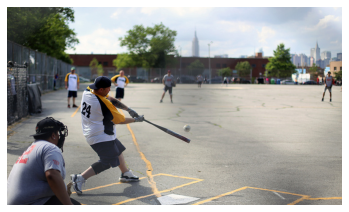

Question : are the men playing tennis?
Actual Answer:  no
Top Predicted answers:  [('yes', 49.438046), ('no', 39.311066), ('black', 0.9819736), ('2', 0.5966353), ('oranges', 0.3787576)]
******************************************************************************************************************************************************


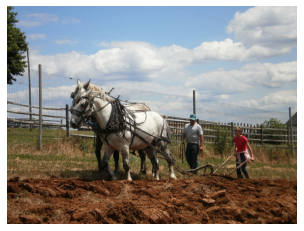

Question : is that a woman in the red shirt?
Actual Answer:  no
Top Predicted answers:  [('yes', 47.488003), ('no', 37.753525), ('black', 1.1099546), ('2', 0.8580347), ('oranges', 0.46102372)]
******************************************************************************************************************************************************


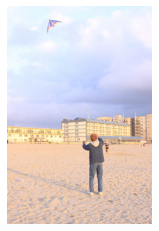

Question : what is the color is his jacket?
Actual Answer:  blue
Top Predicted answers:  [('yes', 49.793858), ('no', 33.61674), ('2', 0.98961455), ('black', 0.92652917), ('oranges', 0.5395284)]
******************************************************************************************************************************************************


In [95]:
#model.load_weights(modelsDirectory + ModelName + "/best.hdf5")
test_idx = np.random.randint(len(X_val), size = 3)
model_vgg = VGG19_Top()
k = 5

for idx in test_idx:
    test_image_id = X_val['image_id'].values[idx]
    test_question = X_val['question'].values[idx]
    actual_answer = X_val['multiple_choice_answer'].values[idx]
    test_image_path = imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (test_image_id)

    test_image_features = model_vgg(tf.expand_dims(load_image(test_image_path)[0], 0))
    test_image_features = np.reshape(test_image_features,(1,-1,test_image_features.shape[-1]))
    test_question_features = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([test_question]),padding='post',
                                                                           maxlen=question_vector_train.shape[1])
    y_pred = recons_model.predict([test_image_features,test_question_features])

    class_indices = tf.math.top_k(y_pred,k=k).indices.numpy()
    percentages = tf.math.top_k(y_pred,k=k).values.numpy()[0] * 100
    predictions = []
    for idx,i in enumerate(class_indices[0]):
        classes = np.zeros((1,1000))
        classes[0][i] = 1
        predictions.append((label_encoder.inverse_transform(classes)[0],percentages[idx]))

    img=mpimg.imread(test_image_path)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

    print("Question :", test_question.replace("<start> ","").replace(" <end>",""))
    print("Actual Answer: ", actual_answer)
    print("Top Predicted answers: ",predictions)
    print("*"*150)